In [336]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from scipy import stats
from scipy import optimize

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

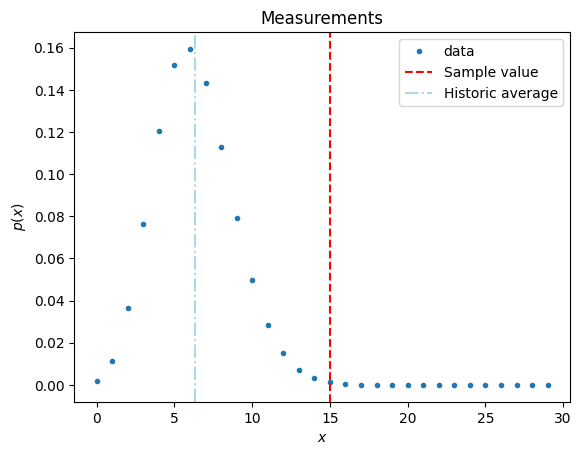

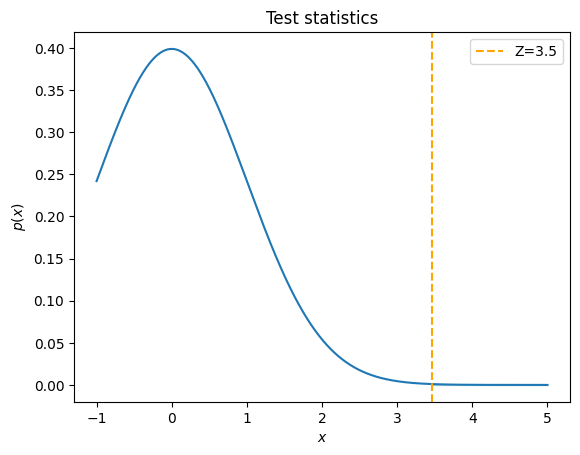

p-value = 0.00026397158691493505
The 2005 number of hurricanes is signficantly larger than the other years.


In [255]:
# Set a significance level
significance_level = 0.022

# Poisson distributed hurricanes mu = sigma^2
x0 = 15
mu = 6.3
sigma_mu = np.sqrt(mu)

x = np.arange(30)
y = stats.poisson.pmf(x, mu)

# Plot the measurement distribution
plt.plot(x, y, '.', label='data')
plt.axvline(x0, linestyle='--', color='red',label='Sample value')
plt.axvline(mu, linestyle='-.', color='lightblue',label='Historic average')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.legend(loc='best')
plt.show()

# Compute Z score
Z = abs(x0 - mu) / sigma_mu

# Plot the test statistics and its pdf
xs = np.linspace(-1, 5, 1000)
ts = stats.norm.pdf(xs,loc=0,scale=1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange',label=f'Z={Z:.1f}')
plt.title("Test statistics")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.legend(loc='best')
plt.show()

# Compute p-value
pvalue = 1-stats.norm.cdf(Z)
print("p-value =", pvalue)

# Null-hypotesis: 15 is not significantly larger
print("The 2005 number of hurricanes", "is" if pvalue < significance_level else "is not" ,"signficantly larger than the other years.")

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

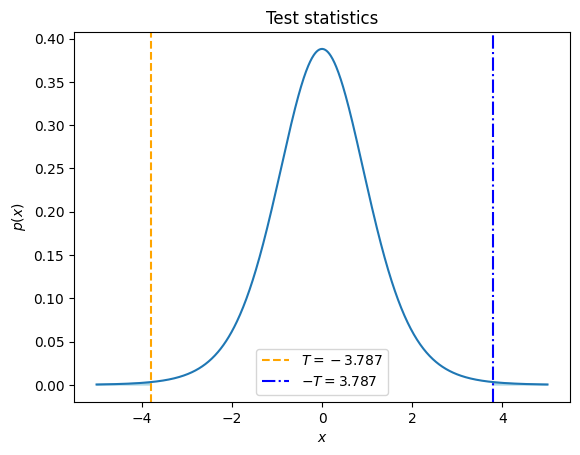

p-value = 0.004302464132864604
The change in blood pressures within our sample is not statistically significant.


In [254]:
# Input data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = len(pre) # size of data samples

# Compute the standard deviation (unbiased estimator) and sample means
sigma = np.sqrt((np.var(pre, ddof=1) + np.var(post, ddof=1)) / 2)
xbar1, xbar2 = np.mean(pre), np.mean(post)

# Compute the T score with the test statistics
T = (xbar1 - xbar2) / (sigma * np.sqrt(2 / n))

# Plot the test statistics pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange',label=f'$T={T:.3f}$')
plt.axvline(-T, linestyle='-.', color='blue',label=f'$-T={-T:.3f}$')
plt.title("Test statistics")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.legend(loc='best')
plt.show()

# Compute the p-value (double sided)
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

# Set a significance level
significance_level = 0.05

# Null-hypothesis: It is statistically significant
print("The change in blood pressures within our sample is", "not" if pvalue < significance_level else "", 
      "statistically significant.")

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Goodness of fit for max temp:  0.9766752925627983
Goodness of fits for min temp:  0.9570699008184621
Time offset min: -0.72 +- 0.10
Time offset max: -1.16 +- 0.13


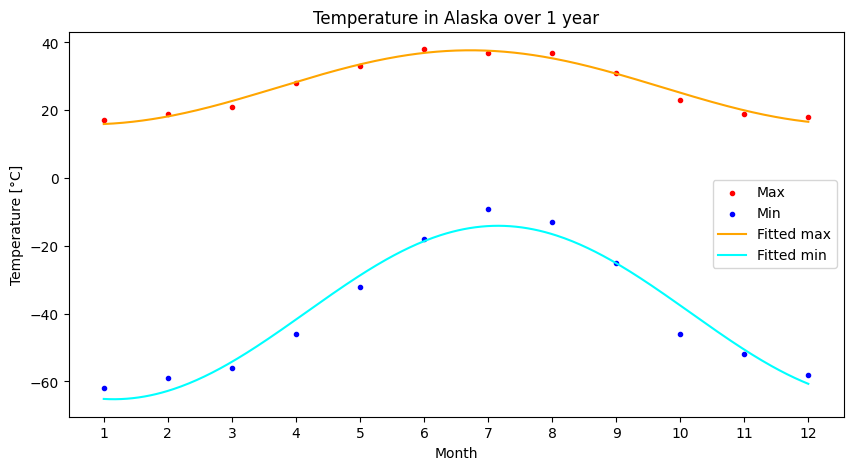

In [333]:
# Input data (Temperatures in °C)
max = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
n = len(max)

# Plot input
months = np.arange(1,n+1)
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(months, max, marker='.', color='red', label='Max')
plt.scatter(months, min, marker='.', color='blue', label='Min')
plt.xlabel('Month')
plt.ylabel('Temperature [°C]')
plt.xticks(months)
plt.title('Temperature in Alaska over 1 year')
plt.legend()

# Fit sinusoidal function
def f(t, amp, phase, offset):
    return amp * np.cos(2 * np.pi * (t  + phase) / 12) + offset

popt_max, pcov_max = optimize.curve_fit(f, months, max, p0=[10, 0, 20], full_output=False)
popt_min, pcov_min = optimize.curve_fit(f, months, min, p0=[20, 0, -40], full_output=False)

# Plot fit
t = np.linspace(1,12,365)
plt.plot(t, f(t, popt_max[0], popt_max[1], popt_max[2]), color='orange', label='Fitted max')
plt.plot(t, f(t, popt_min[0], popt_min[1], popt_min[2]), color='cyan', label='Fitted min')
plt.legend(loc='best')

# Check the goodnes of fit
max_hat = f(months, popt_max[0], popt_max[1], popt_max[2])
min_hat = f(months, popt_min[0], popt_min[1], popt_min[2])

ssr_max = np.sum((max_hat - max)**2)
tss_max = np.sum((np.mean(max_hat) - max)**2)

rsq_max = 1 - ssr_max / tss_max

ssr_min = np.sum((min_hat - min)**2)
tss_min = np.sum((np.mean(min_hat) - min)**2)

rsq_min = 1 - ssr_min / tss_min

print("Goodness of fit for max temp: ", rsq_max)
print("Goodness of fits for min temp: ", rsq_min)

# Time offset
print("Time offset min: %.2f +- %.2f" % (popt_max[1], np.sqrt(pcov_max[1,1])))
print("Time offset max: %.2f +- %.2f" % (popt_min[1], np.sqrt(pcov_min[1,1])))
# Close but not the same as we can see from the plot

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

scale: 6943.60 +- 187.87
mu: -0.07 +- 0.01
sigma: 0.27 +- 0.01
chi2 = 26.284864523877122
p-value = 0.9842922218050605
The fit is satisfactory.


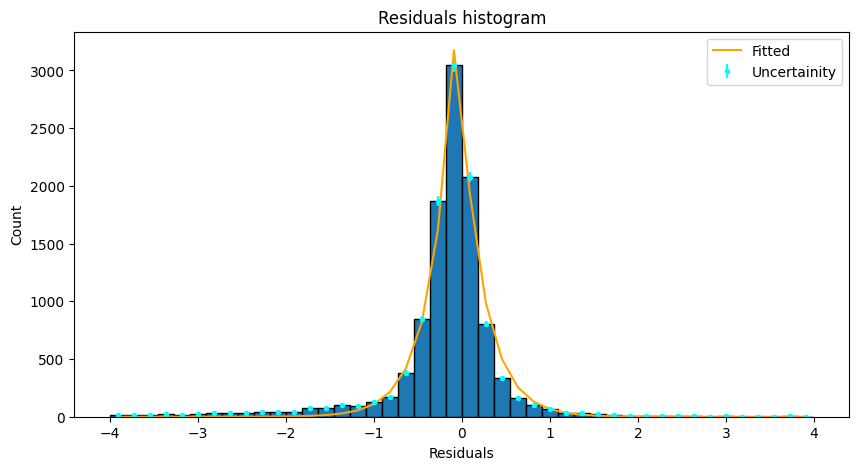

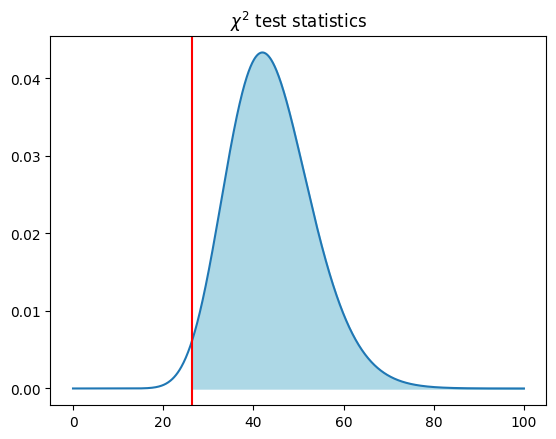

In [569]:
# Input data
infile = open('data/residuals_261.pkl', 'rb')
new_dict = pickle.load(infile)
infile.close()

residual = pd.DataFrame.from_dict(new_dict.reshape(1)[0])['residuals']

# Plot histogram
n_bins = int(2*len(residual)**(1/3)) # Rice rule
fig, ax = plt.subplots(figsize=(10,5))
n_i, bins, _ = ax.hist(residual, bins=n_bins, range=(-4,4), edgecolor='k')
ax.set_xlabel("Residuals")
ax.set_ylabel("Count")
ax.set_title("Residuals histogram")

# Compute uncertainity
sigma_i = np.sqrt(n_i)

mean_i = (0.5 * (bins[1:] + bins[:-1]))
ax.errorbar(mean_i, n_i, yerr=sigma_i, fmt='.',color='cyan',label='Uncertainity')

# Fit the histogram with a Laplace distribution
def laplace(x, scale, mu, b):
    return scale * 0.5 * np.exp(-abs(x - mu) / b)

popt, pcov = optimize.curve_fit(laplace, mean_i, n_i, p0=[500, 0, 1], full_output=False)
print("scale: %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("mu: %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("sigma: %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))

# Plot fit
y_hat = laplace(mean_i, popt[0], popt[1], popt[2])
ax.plot(mean_i, y_hat, color='orange', label='Fitted')
plt.legend(loc='best')

# Compute the chi^2
chi2 = np.sum(((n_i - y_hat) ** 2) / n_i ** 2)
print("chi2 =", chi2)

# Compute the p-value
ndof = len(mean_i)
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue)  # if the p-value is < 0.05, the fit is considered unsatisfactory
print("The fit", "is not" if pvalue < 0.05 else "is", "satisfactory.")

# Plot chi^2 test statistics
p = np.linspace(0, 100, 1000)
ts = stats.chi2.pdf(p, df=ndof)
plt.figure()
plt.plot(p, ts)
plt.title("$\chi^2$ test statistics")
plt.axvline(chi2, color='red')
plt.fill_between(p, ts, where=(p > chi2), color='lightblue')
plt.show()

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

Amplitude: 9.96 +- 0.13
Phase: 2.91 +- 0.01
Offset: 9.26 +- 0.09
Overall average temperature in Munich:  9.261252084167237 [°C]
Typical daily average values predicted by the model for the coldest time of year: -0.6889583031364435
Typical daily average values predicted by the model for the hottest time of year: 19.209171243510617


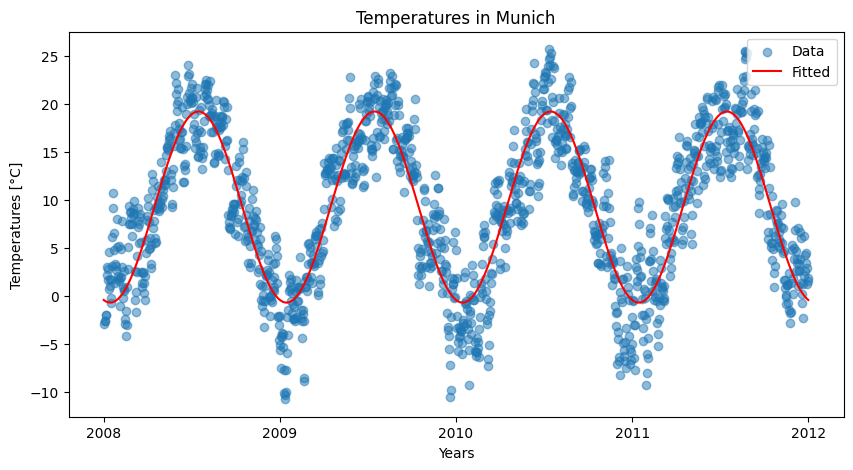

In [673]:
# Input data
file = "data/munich_temperatures_average_with_bad_data.txt"
df = pd.read_csv(file,delimiter=' ',header=None)

# Input cleaning
df = df[(df[0] >= 2008) & (df[0] <= 2012)]
df = df[df[1] < 50]

years = df[0].values
temperatures = df[1].values

# Plot input
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(years,temperatures, alpha=0.5, label='Data')
ax.set_xlabel('Years')
ax.set_ylabel('Temperatures [°C]')
ax.set_xticks(np.arange(2008, 2013))
ax.set_title('Temperatures in Munich')

# Fit function
# b: It is the phase of the cosine function. It affects the cosine position along the time axis. 
# (positive: left shift - negative : right shift)
# In our case it provides insight on the season timing: Being positive and close to pi it indicates that
# the warm season occurs approximately mid year
def f(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

popt, pcov = optimize.curve_fit(f, years, temperatures, p0=[10, 1, 0], full_output=False)
print("Amplitude: %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("Phase: %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("Offset: %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))

# Plot fit
t = np.linspace(2008,2012,1000)
ax.plot(t, f(t, *popt), color='red', label='Fitted')
plt.legend(loc='best')

# Output temperatures
print("Overall average temperature in Munich: ", np.mean(temperatures), "[°C]")
print("Typical daily average values predicted by the model for the coldest time of year:", f(years[np.argmin(temperatures)], *popt))
print("Typical daily average values predicted by the model for the hottest time of year:", f(years[np.argmax(temperatures)], *popt))